## Criação dos DataFrames para EDA (Exploratory Data Analysis)
Criar arquivos "marketok", "portifolio1ok", "portifolio2ok" e "portifolio3ok" com os features que possuem menos de 32% de dados faltantes.

**[Dicionário de dados](https://s3-us-west-1.amazonaws.com/codenation-challenges/ml-leads/features_dictionary.pdf)**

In [184]:
# configurações de plot
# seaborn
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()
# pyplot
import matplotlib.pyplot as plt


In [185]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 200)
pd.option_context('display.max_rows', None, 'display.max_columns', None)

memory usage:

DataFrame original 

df_market.info() =  614.1+ MB

df_market.info(memory_usage='deep') = 1.2 GB

df_market.memory_usage(index=True).sum() = 643.981.114 

DataFrame original com a seleção de Percent_of_Missing < 0.32 

df_market.info() =  134.5+ MB

df_market.info(memory_usage='deep') = 765.8 MB

df_market.memory_usage(index=True).sum() = 141.000.890

In [186]:
df_market = pd.read_csv('market.csv', index_col=0)

In [187]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 614.1+ MB


In [188]:
df_market.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 1.2 GB


In [189]:
df_market.memory_usage(index=True).sum()

643981114

In [190]:
total = df_market.isnull().sum().sort_values(ascending=False)
percent = (df_market.isnull().sum()/df_market.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total_Missing_Count', 'Percent_of_Missing'])
missing_data.index.name ='df_market'

In [191]:
missing_data

,Total_Missing_Count,Percent_of_Missing
df_market,,
qt_alteracao_socio_180d,462298,1.000000
grau_instrucao_macro_desconhecido,462298,1.000000
qt_alteracao_socio_90d,462298,1.000000
qt_alteracao_socio_365d,462298,1.000000
qt_alteracao_socio_total,462298,1.000000
coligada_mais_nova_baixada,462162,0.999706
coligada_mais_antiga_baixada,462162,0.999706
idade_media_coligadas_baixadas,462162,0.999706
vl_total_veiculos_antt,462122,0.999619


Quantidade de sócios masculino e feminino nas features `qt_socios_feminino` e `qt_socios_masculino` parecem ser features relevantes.

Por isso, o corte de dados faltantes será setado em 70%

In [192]:
perc_miss_features = 0.7 

In [193]:
# DataFrame criado com os features que possuem menos de 70% de dados faltantes
keep_data = missing_data[missing_data['Percent_of_Missing'] < perc_miss_features]

In [194]:
keep_data.count()

Total_Missing_Count    52
Percent_of_Missing     52
dtype: int64

In [195]:
keep_data.head()

,Total_Missing_Count,Percent_of_Missing
df_market,,
qt_socios_feminino,317269,0.686287
qt_socios_masculino,267183,0.577945
qt_socios_st_regular,154917,0.335102
idade_media_socios,151602,0.327931
idade_minima_socios,151602,0.327931


In [196]:
active_columns = keep_data.index
active_columns

Index(['qt_socios_feminino', 'qt_socios_masculino', 'qt_socios_st_regular', 'idade_media_socios', 'idade_minima_socios', 'idade_maxima_socios', 'empsetorcensitariofaixarendapopulacao',
       'qt_socios_pj', 'qt_socios', 'qt_socios_pf', 'fl_optante_simples', 'fl_optante_simei', 'nm_meso_regiao', 'nm_micro_regiao', 'nu_meses_rescencia', 'vl_faturamento_estimado_grupo_aux',
       'vl_faturamento_estimado_aux', 'de_faixa_faturamento_estimado_grupo', 'de_faixa_faturamento_estimado', 'de_saude_rescencia', 'de_saude_tributaria', 'de_nivel_atividade', 'sg_uf_matriz',
       'fl_antt', 'setor', 'nm_divisao', 'nm_segmento', 'fl_spa', 'fl_passivel_iss', 'fl_veiculo', 'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'fl_simples_irregular',
       'dt_situacao', 'fl_me', 'fl_matriz', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro', 'de_ramo', 'idade_empresa_anos', 'idade_emp_cat', 'qt_filiais', 'fl_sa', 'fl_epp', 'fl_mei',
       'fl_ltda', 'fl_st_especial', 'fl_emai

In [197]:
df_market_ok = pd.read_csv('market.csv', index_col=0, usecols=active_columns)

### Checkpoint 1: Limpeza de dados faltantes
Até aqui, as features com acima de 70% de dados faltantes foram dropadas do dataset

In [198]:
# Guardando market ok em csv
df_market_ok.to_csv("marketok.csv")

### Analisando as features
Análise dos tipos de dados e preenchimento das features 

In [199]:
df_market_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 51 columns):
fl_matriz                                462298 non-null bool
de_natureza_juridica                     462298 non-null object
sg_uf                                    462298 non-null object
natureza_juridica_macro                  462298 non-null object
de_ramo                                  462298 non-null object
setor                                    460371 non-null object
idade_empresa_anos                       462298 non-null float64
idade_emp_cat                            462298 non-null object
fl_me                                    462298 non-null bool
fl_sa                                    462298 non-null bool
fl_epp                                   462298 non-null bool
fl_mei                                   462298 non-null bool
fl_ltda       

In [200]:
df_market_ok.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 51 columns):
fl_matriz                                462298 non-null bool
de_natureza_juridica                     462298 non-null object
sg_uf                                    462298 non-null object
natureza_juridica_macro                  462298 non-null object
de_ramo                                  462298 non-null object
setor                                    460371 non-null object
idade_empresa_anos                       462298 non-null float64
idade_emp_cat                            462298 non-null object
fl_me                                    462298 non-null bool
fl_sa                                    462298 non-null bool
fl_epp                                   462298 non-null bool
fl_mei                                   462298 non-null bool
fl_ltda       

In [201]:
df_market_ok.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,NaN,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,0.0,0.0,NaN,PI,CINZA,ATE 1 ANO,9.0,BAIXA,False,468.93,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,True,0.0,0.0,True,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,713.50,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,32.0,32.0,32.0,NaN,1.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,True,0.0,0.0,False,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,475.73,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,36.0,36.0,36.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,2015-08-17,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,False,2874.04,LESTE POTIGUAR,NATAL,True,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


### Distribuição das features
Valores booleanos

In [202]:
# verificando se há valores object com comportamento de booleanos
df_market_obj = df_market_ok.select_dtypes(['object'])

df_market_obj.head()

# sim ou não
# df_market_obj.fl_rm.unique()
df_market_obj.fl_rm = (df_market_obj.fl_rm == 'SIM').astype(int)

# true, false ou nan
cols_bool = [
        'fl_spa', 
        'fl_antt', 
        'fl_veiculo', 
        'fl_optante_simples', 
        'fl_optante_simei', 
        'fl_simples_irregular', 
        'fl_passivel_iss'
       ]

for col in cols_bool:
    df_market_obj[col] = (df_market_obj[col] == True).astype(int)

cols_bool.append('fl_rm')    

# dataframe pronto, com valores inteiros 0 ou 1
df_market_obj = df_market_obj[cols_bool].copy()

# df_market_obj.fl_spa.unique()
# df_market_obj.fl_antt.unique()
# df_market_obj.fl_veiculo.unique()
# df_market_obj.fl_optante_simples.unique()
# df_market_obj.fl_optante_simei.unique()
# df_market_obj.fl_simples_irregular.unique()
# df_market_obj.fl_passivel_iss.unique()

df_market_obj.head()

/home/tiago/.local/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_simples_irregular,fl_passivel_iss,fl_rm
id,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,0,0,1,0,0,1,1
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,0,0,0,0,0,0,1,1
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,0,0,0,1,1,0,1,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,0,0,0,1,0,0,1,1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,0,0,0,1,0,0,1,1


In [203]:
# booleanos
df_market_bool = df_market_ok.select_dtypes(['bool'])

# verificando se há nulos
# print(df_market_bool.info())
# print(df_market_bool.shape)

In [204]:
# como não há nulos, podemos converter para int
for col in df_market_bool:
    df_market_bool[col] = df_market_bool[col].astype(int)

# df_market_bool.head()

/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
# merge do dataframe de objetos "booleanos" com dataframe booleano
df_market_bool = pd.merge(df_market_bool, df_market_obj, left_index=True, right_index=True)

df_market_bool.head()

,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_simples_irregular,fl_passivel_iss,fl_rm
id,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1


/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


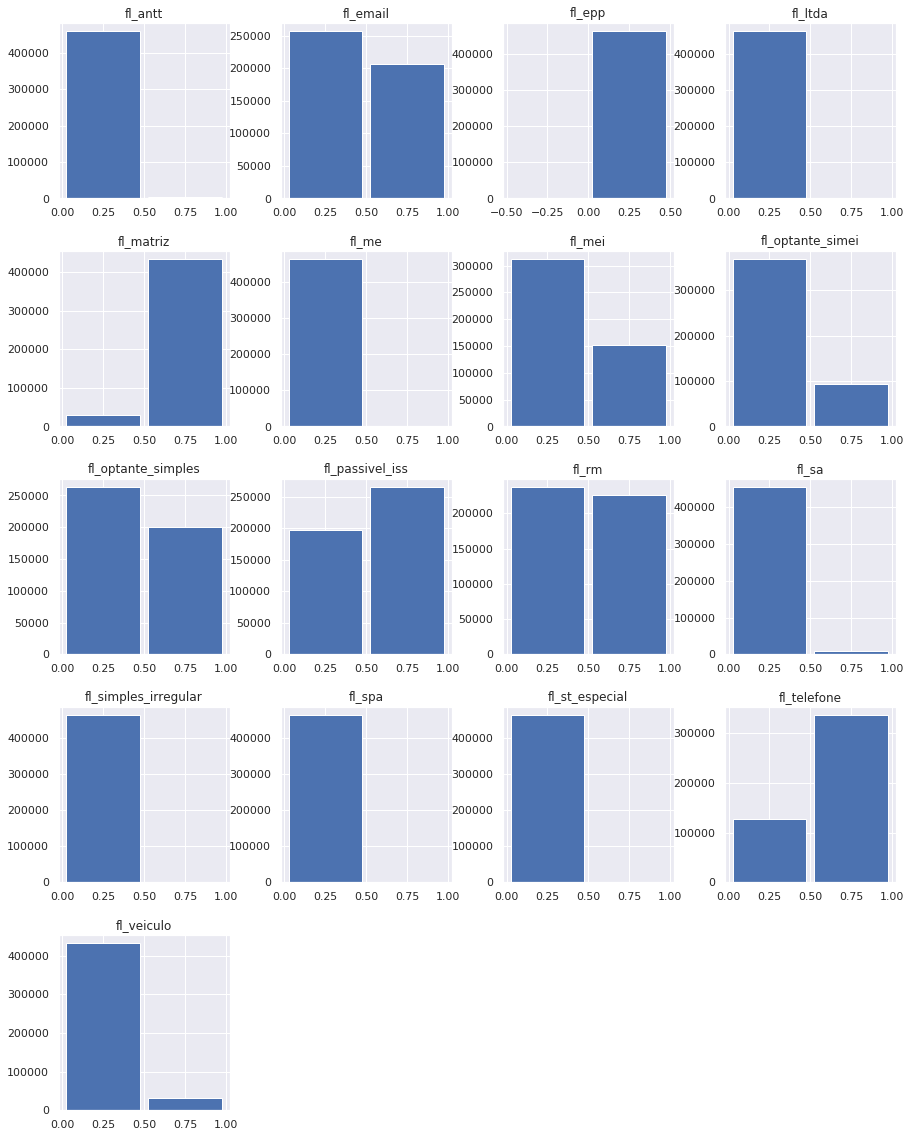

In [206]:
# plot histograma    
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_market_bool.hist(grid=True, bins=2, rwidth=0.9, ax=ax) 
plt.show()

In [207]:
# dropando features booleanas antigas do dataset ok
cols = list(df_market_bool.columns)
# cols.remove('key_0')

df_market_ok.drop(cols, inplace=True, axis=1)


In [208]:
def index_adjust(df, index='id'):
    """
    Ajuste do index do data frame após o merge com
    outro dataset
    
    Parâmetros:
    
    df: dataframe com o index a ser ajustado
    index: nome do index a ser ajustado (opcional)
    """
    df.drop('key_0', inplace=True, axis=1)
    df.rename(columns = {"key_1": index}, inplace = True) 
    df.set_index(index, inplace=True)
    
    return df


In [183]:
# merge do dataset ok com dataset bool
df_market_ok = pd.merge(df_market_ok, df_market_bool, on=[df_market_ok.index, df_market_bool.index])

# ajustando index do dataset ok
df_market_ok = index_adjust(df_market_ok)

# df_market_ok.head()
df_market_bool.head()

# drop dos booleanos com apenas um valor (apenas true ou apenas false)
for col in df_market_bool:
    print(col)
    print()
#     if df_market_ok[col].sum() / df_market_ok[col].count() < 0.01:
#         print(col)
        
df_market_ok.head()

fl_me
fl_epp
fl_ltda
fl_st_especial
fl_spa
fl_antt
fl_simples_irregular


KeyError: 'de_natureza_juridica'

In [165]:
df_market_ok.head()

,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,2005-03-25,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,NaN,LESTE POTIGUAR,NATAL,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,2017-05-12,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,0.0,0.0,PI,CINZA,ATE 1 ANO,9.0,BAIXA,468.93,CENTRO NORTE PIAUIENSE,TERESINA,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,2011-09-26,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,713.50,CENTRO AMAZONENSE,MANAUS,1.0,1.0,0.0,32.0,32.0,32.0,NaN,1.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,2012-04-25,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,475.73,CENTRO AMAZONENSE,MANAUS,1.0,1.0,0.0,36.0,36.0,36.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,2015-08-17,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,2874.04,LESTE POTIGUAR,NATAL,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


### Checkpoint 2: Conversão de booleanos para inteiros
Os dados booleanos e string caracterizadas como booleanos foram convertidos para inteiros (0 ou 1)

In [26]:
# Guardando market ok em csv
df_market_ok.to_csv("marketok.csv")

### Aplicando label encoder
Nas features tipo `object`

In [172]:
# separando os tipos object
df_market_obj = df_market_ok.select_dtypes(['object'])
df_market_obj.head()

,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
id,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,10 a 15,2005-03-25,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,NATAL,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00"
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1 a 5,2017-05-12,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,PI,CINZA,ATE 1 ANO,BAIXA,CENTRO NORTE PIAUIENSE,TERESINA,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,5 a 10,2011-09-26,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,"ATE R$ 81.000,00","ATE R$ 81.000,00"
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,5 a 10,2012-04-25,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,1 a 5,2015-08-17,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,NATAL,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"


In [167]:
# aplicando label encoder
label_encoder=LabelEncoder()

df_encoded = df_market_obj.copy()

for col in df_market_obj:
    values = df_market_obj[col].apply(str).values
    df_encoded[col] = label_encoder.fit_transform(values)


In [29]:
# Merge do dataset ok com o label encode

# drop das features object do dataset ok
df_market_ok.drop(df_market_obj.columns, inplace=True, axis=1)

# merge das features object com label encode
df_market_ok = pd.merge(df_market_ok, df_encoded, on=[df_market_ok.index, df_encoded.index])

# ajuste do index do dataset
df_market_ok = index_adjust(df_market_ok)

df_market_ok.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,14.457534,0.0,0.0,23.0,NaN,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,3132172.8,3132172.8,0,60,4,2,11,2,1,2709,32,10,19,4,0,0,6,48,2,2
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1.463014,0.0,0.0,9.0,468.93,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,210000.0,210000.0,0,17,3,5,21,4,0,6811,3,3,16,2,1,1,4,69,10,10
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,7.093151,0.0,0.0,26.0,713.50,1.0,1.0,0.0,32.0,32.0,32.0,NaN,1.0,NaN,50000.0,50000.0,0,17,1,5,32,4,3,4783,86,20,2,0,0,2,2,43,1,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,6.512329,0.0,0.0,26.0,475.73,1.0,1.0,0.0,36.0,36.0,36.0,1.0,1.0,NaN,210000.0,210000.0,0,17,1,5,25,4,3,4994,74,17,2,0,0,2,2,43,10,10
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,3.200000,0.0,0.0,27.0,2874.04,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,210000.0,210000.0,0,17,4,5,27,4,0,6183,77,8,19,4,0,0,6,48,10,10


### Checkpoint 3: Conversão de todas as features para inteiros
Agora todas as features estão prontas para algoritmos e modelos

In [30]:
# Guardando market ok em csv
df_market_ok.to_csv("marketok.csv")

### Preenchendo valores nulos

In [31]:
# Lista das features com valores nulos
cols = df_market_ok.isna().any()
cols = cols[(cols == True)]
cols = list(cols.index)

# dataframe com features que contém valores nulos
df_null = df_market_ok[cols]

df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 15 columns):
vl_total_veiculos_pesados_grupo          460371 non-null float64
vl_total_veiculos_leves_grupo            460371 non-null float64
nu_meses_rescencia                       417022 non-null float64
empsetorcensitariofaixarendapopulacao    318469 non-null float64
qt_socios                                347207 non-null float64
qt_socios_pf                             347207 non-null float64
qt_socios_pj                             347207 non-null float64
idade_media_socios                       310696 non-null float64
idade_maxima_socios                      310696 non-null float64
idade_minima_socios                      310696 non-null float64
qt_socios_st_regular                     307381 non-null float64
qt_socios_masculino                      195115 non-null f

#### Preenchendo valores numéricos

/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


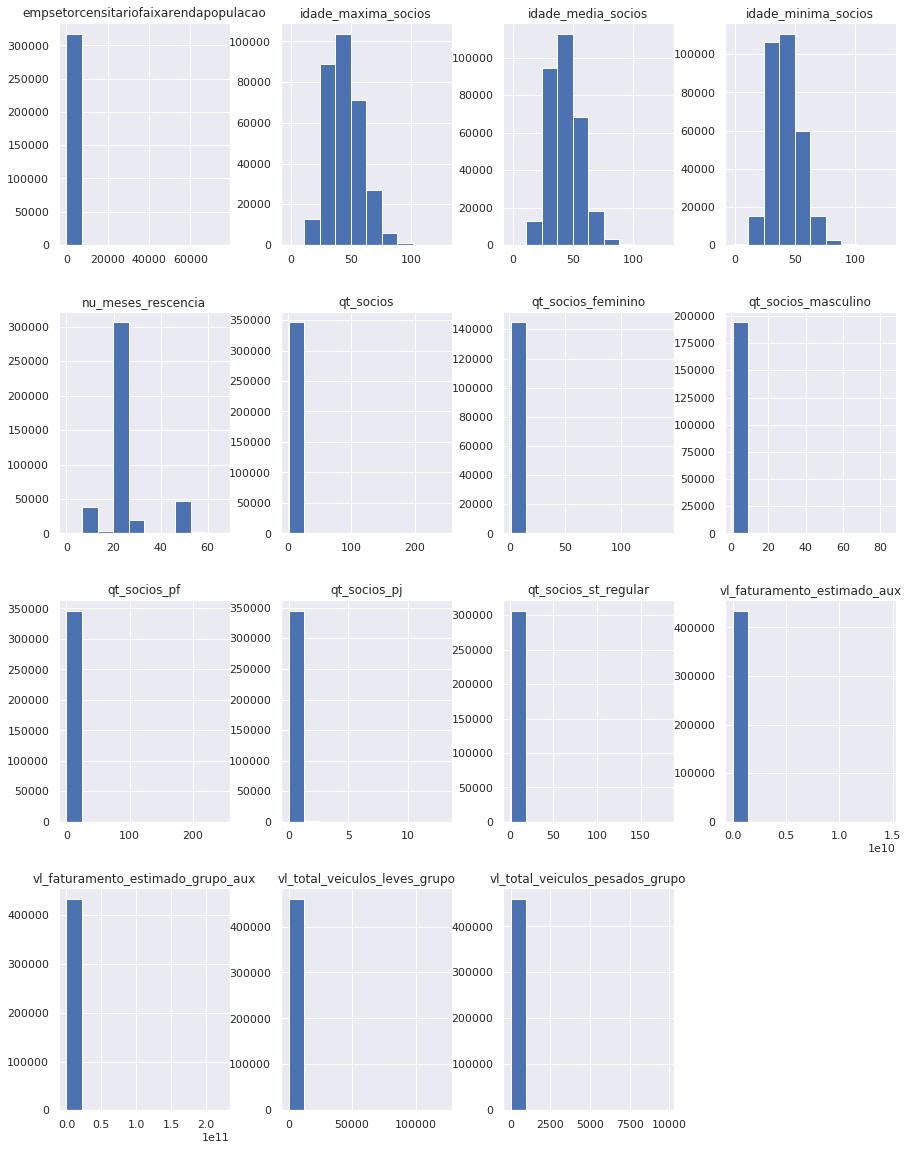

In [138]:
# plot histograma    
# TODO: tirar outliers na visualização
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_null.hist(grid=True, ax=ax) 
plt.show()

# df_null_num[cols1].head()

In [ ]:
df_market_ok.memory_usage(index=True).sum()

In [ ]:
df1_ok = pd.read_csv('portfolio1.csv', index_col=0, usecols=active_columns)

In [ ]:
df1_ok.to_csv("portfolio1ok.csv")

In [ ]:
df2 = pd.read_csv('portfolio2.csv', index_col=0)

In [ ]:
df2_ok = pd.merge(df2, df_market_ok, how='left', on=['id'])
df2_ok.head(3)

In [ ]:
df2_ok.to_csv("portfolio2ok.csv")

In [ ]:
df3 = pd.read_csv('portfolio3.csv', index_col=0)

In [ ]:
df3_ok = pd.merge(df3, df_market_ok, how='left', on=['id'])
df3_ok.head(3)

In [ ]:
df3_ok.to_csv("portfolio3ok.csv")

In [ ]:
df3_ok.shape